# Clustering

### Hierarchical clustering:
- Clustering approach in which cluster boundaries are nested to each other, creating a parent/child relationship.
- This nested structure between clusters creates a hierarchy, that is often represented in the form of a cluster tree, known as dendogram

### Partitional Clustering:
- Each cluster boundary is independent of the others. There is no hierarchy between clusters. Dividing data objects into non overlapping groups.
- No object can be a member of more than one cluster, and each cluster have at least one object

### Overlaping Clustering
- Approach in which the boundary of one cluster can overlap that of another. Each object of the dataset can be member of one or more clusters. 
- There is no parent-child relationship here, the boundaries of the child not always are in the boundaries of the parent

### Fuzzy/soft clustering
- the membership of an item to a particulary cluster, is based on a membership weight that goes between 0 and 1. The larger the weight, the greater the item belongs to a particular cluster.
- If the weight is 0, the item absolutely does not belong to the cluster. If the weight is 1, then the item absolutely belong to the cluster.

### Density based clustering
- Determine cluster assignments based on the density of data points in a region
- Clusters are assign where there are high densities of data points separated by low density regions

## The k-Means belongs to partitional clustering
- Used for market segmentation, social network analysis, search result grouping and anomaly detection
- How many clusters 'k' do we want?
- The algorithm uses a process known as expectation maximization to assign every item to one and only one cluster
- Calculates the Euclidian distance between each point and each of the clusters centers

### How to choose the right 'k'?
- Based on a priori knowledge or business requirements
- Using a rule of thumb, such as k ~= (n/2)^(1/2), where 'n' = number of observations. But only with small datasets
- Using one or more statistical measures, such as the Elbow method, the average Silhouete method and the Calinski-Harabasz Score

### WCSS - Within-cluster sum of squares quantifies the degree of similarity between items in a cluster
- the wcss is the sum of the squared distances from each item in the cluster to the cluster centroid
- as the value of k increases, the items in each cluster become closer and the WCSS becomes smaller


<img src="images/wcss.png" width=400>

### The Elbow Method
- Based on the WCSS, choose K at the most significant inflection point between WCSS and the number of cluster, i.e. increasing the value of k, no longer yields a significant reduction of WCSS

<img src="images/elbow.png" width=400>

### The Average Silhouette Method
- The silhouette of an item is a measure of how closely the item is matched with other items within the same cluster, and how loosely it is matched with items in neighboring clusters
    - The higher is the silhouette value of an item, the more likely that it is in the right cluster
    - The range is -1 to 1, sillouette value of 1, implies that an item is in the right cluster. While a silhouette value of -1, implies that is the wrong cluster
    - Based on the average of all silhouettes, called silhouette score, the highest score means the optimal number of clusters

<img src="images/av_Silhouette.png" width=400>

### The Calinski-Harazabasz Score
  - Is an adjusted ratio of the between-cluster sum of squares and the within-cluster sum of squares
  - 'n' is the number of items in the dataset, and k is the number of clusters
  - The higher the score, the more dense and more separated the clusters are
  - It is important to known, that the higher the score doesn't mean that is the right value of 'k'. But the peak or the most significant inflection point, or elbow

<img src="images/calinski-harazabasz.png" width=700>

# 1. Collecting the Data

In [2]:
import pandas as pd
customers = pd.read_csv('../data/mallcustomers.csv')
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


# 2. Exploring the data

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
customers.describe(include = 'all')

,CustomerID,Gender,Age,Income,SpendingScore
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60560.000000,50.200000
std,57.879185,NaN,13.969007,26264.721165,25.823522
min,1.000000,NaN,18.000000,15000.000000,1.000000
25%,50.750000,NaN,28.750000,41500.000000,34.750000
50%,100.500000,NaN,36.000000,61500.000000,50.000000
75%,150.250000,NaN,49.000000,78000.000000,73.000000


In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

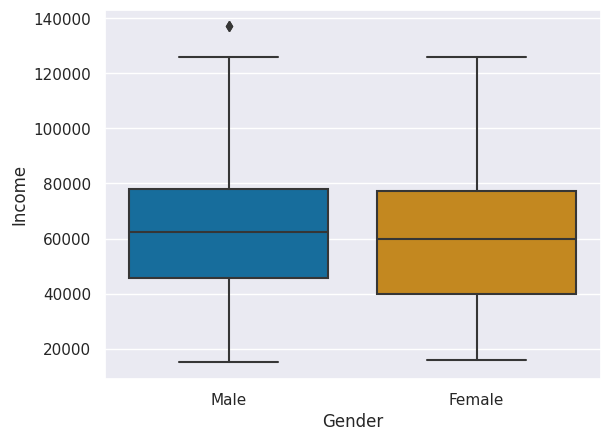

In [6]:
ax = sns.boxplot(
    data=customers,
    x = 'Gender',
    y = 'Income',
    palette = 'colorblind'
)

- We can see that is not significant difference between Gender x Income

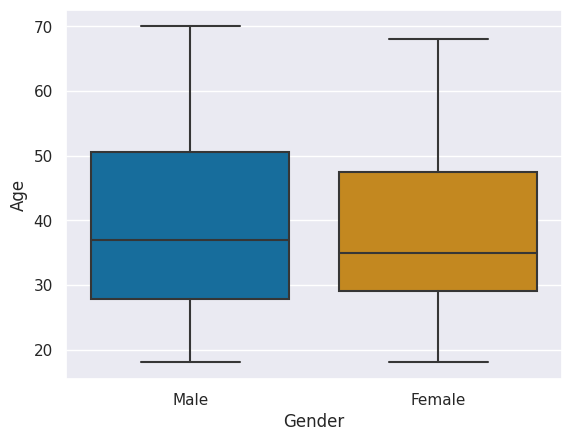

In [7]:
ax = sns.boxplot(
    data=customers,
    x = 'Gender',
    y = 'Age',
    palette = 'colorblind'
)

- We can see that is not significant difference between Gender x Age

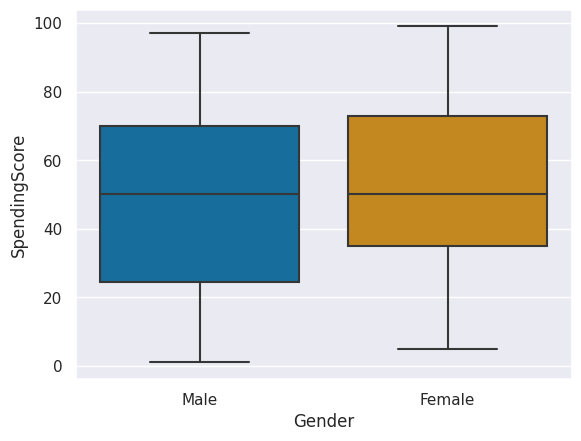

In [8]:
ax = sns.boxplot(
    data=customers,
    x = 'Gender',
    y = 'SpendingScore',
    palette = 'colorblind'
)

- We can see that is not significant difference between Gender x SpendingScore

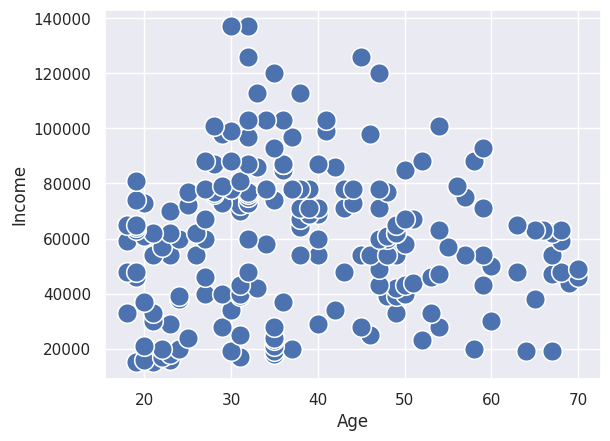

In [9]:
ax = sns.scatterplot(
    data=customers,
    x = 'Age',
    y = 'Income',
    s = 200
)

- There appears to be a slight positive linear relationship between Income and Age, between the ages of 20 and 40, and the relationship appears to turn negative to age > 50

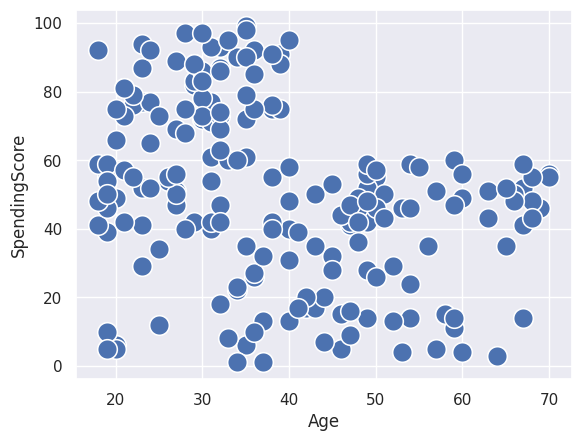

In [10]:
ax = sns.scatterplot(
    data=customers,
    x = 'Age',
    y = 'SpendingScore',
    s = 200
)

- A stronger positive relationship between SpendingScore and Age < 40

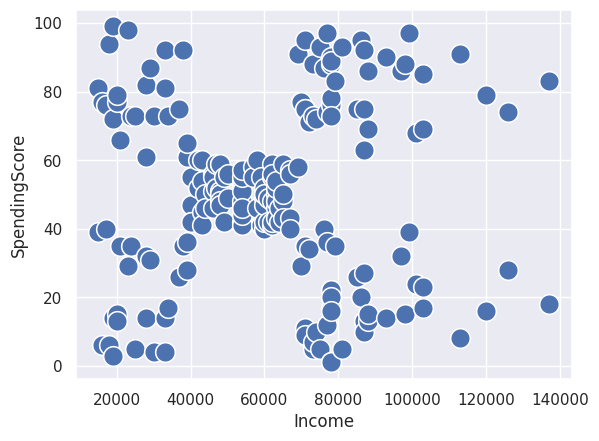

In [11]:
ax = sns.scatterplot(
    data=customers,
    x = 'Income',
    y = 'SpendingScore',
    s = 200
)

- There isn't a clear linear relationship between Income and SpendingScore, but we can see somewhat of a sense of the possible clusters. 
- There is a significant difference between the range of values between Income and SpendingScore

# 3. Prepare the Data

In [12]:
customers[['Income', 'SpendingScore']].describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,60560.00,50.20
std,26264.72,25.82
min,15000.00,1.00
25%,41500.00,34.75
50%,61500.00,50.00
75%,78000.00,73.00
max,137000.00,99.00


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
customers_scaled = scaler.fit_transform(customers[['Income', 'SpendingScore']])

In [21]:
customers_scaled = pd.DataFrame(customers_scaled, columns = ['Income', 'SpendingScore'])
customers_scaled.head()

,Income,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [23]:
#now we have a mean of 0 and std deviation of 1
customers_scaled.describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


# 4. Create the clusters

In [24]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_init=25, random_state=1234)

In [25]:
km.fit(customers_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [26]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [28]:
# the inertia it is the WCSS
km.inertia_

157.70400815035947

# 5. Evaluation and Visualization of the Clusters

In [30]:
# we have a lot of the label 0, sure it is not optimal
pd.Series(km.labels_).value_counts().sort_index()

0    123
1     38
2     39
dtype: int64

In [31]:
km.cluster_centers_

array([[-0.62618966, -0.01439238],
       [ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275]])

In [33]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns=['Income', 'SpendingScore'])
cluster_centers

,Income,SpendingScore
0,-0.626190,-0.014392
1,1.009200,-1.225535
2,0.991583,1.239503


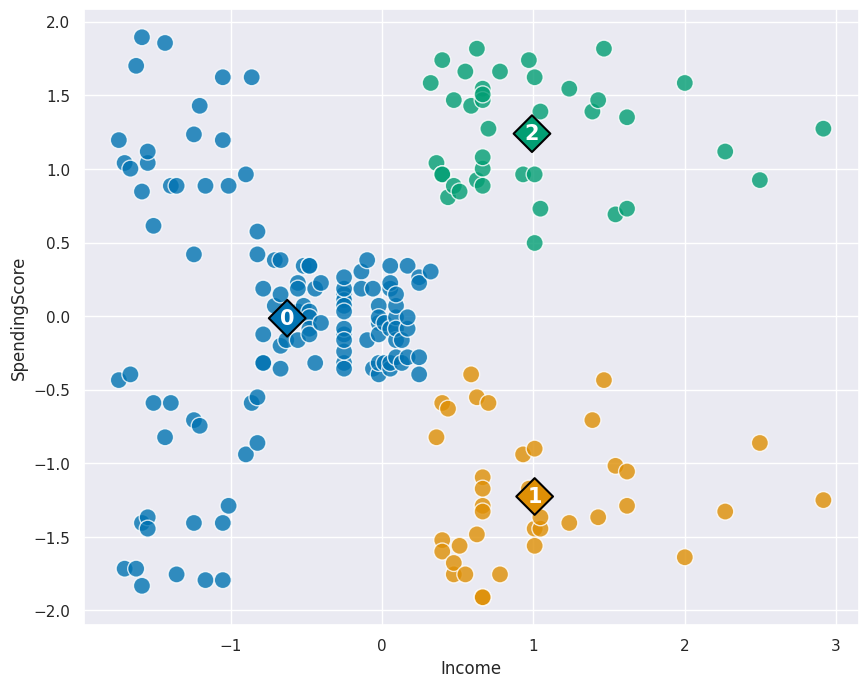

In [42]:
plt.figure(figsize=(10,8))

#plot the clusters
ax = sns.scatterplot(
    data = customers_scaled,
    x = 'Income',
    y = 'SpendingScore',
    hue = km.labels_,
    palette = 'colorblind',
    alpha = 0.8,
    s = 150,
    legend = False
)

#plot the centroids
ax = sns.scatterplot(
    data = cluster_centers,
    x = 'Income',
    y = 'SpendingScore',
    hue = cluster_centers.index,
    palette = 'colorblind',
    s = 350,
    marker = 'D',
    ec = 'black',
    legend = False
)

# #add centroids labels
for i in range(len(cluster_centers)):
    plt.text(
        x = cluster_centers.Income[i],
        y = cluster_centers.SpendingScore[i],
        s = i,
        horizontalalignment = 'center',
        verticalalignment = 'center',
        size = 15,
        weight = 'bold',
        color = 'white'
        )

# 6. Choose the right number of Clusters

### The Within Cluster Sum of Squares (WCSS)

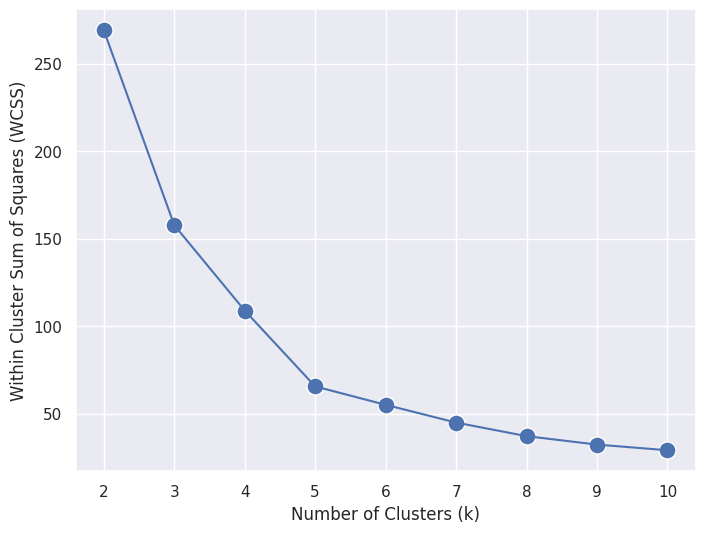

In [44]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize = (8, 6))
ax = sns.lineplot(
    y = wcss_series, 
    x = wcss_series.index
)
ax = sns.scatterplot(
    y = wcss_series, 
    x = wcss_series.index, 
    s=150
)
ax = ax.set(
    xlabel = 'Number of Clusters (k)',
    ylabel = 'Within Cluster Sum of Squares (WCSS)'
)

### The Average Silhouette Score

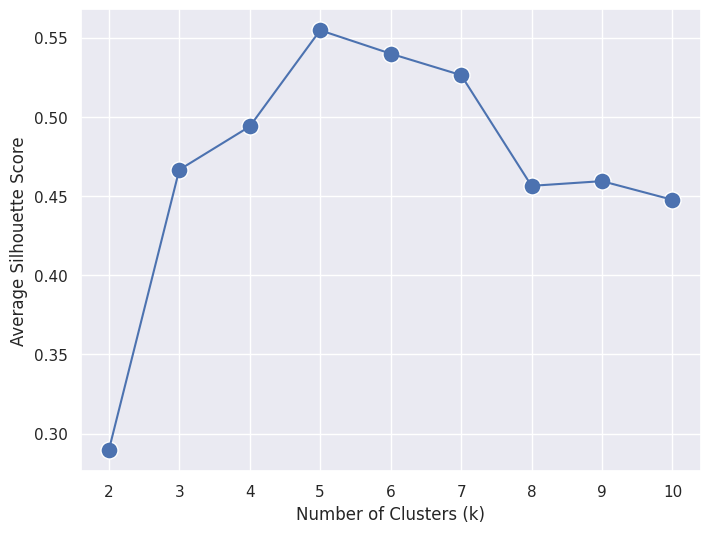

In [46]:
from sklearn.metrics import silhouette_score

silhouette = []

for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    silhouette.append(silhouette_score(customers_scaled, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8,6))
ax = sns.lineplot(
    y = silhouette_series, 
    x = silhouette_series.index
)
ax = sns.scatterplot(
    y = silhouette_series, 
    x = silhouette_series.index,
    s = 150
)
ax = ax.set(
    xlabel = 'Number of Clusters (k)',
    ylabel = 'Average Silhouette Score'
)

### The Calinski Harabasz Score

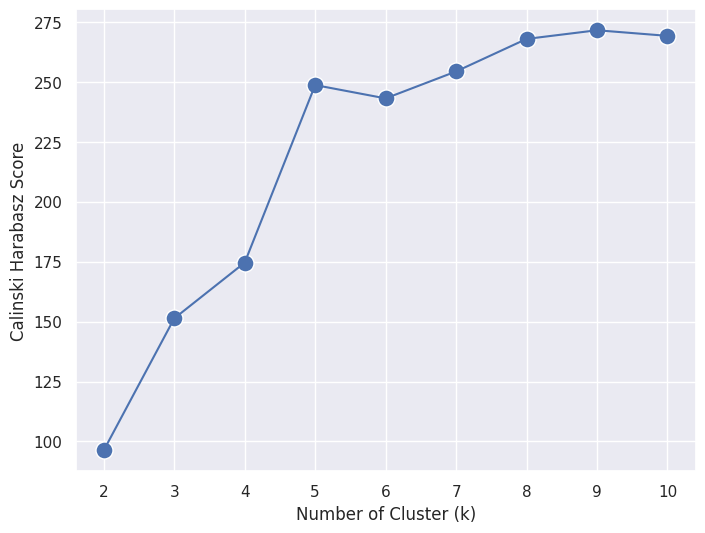

In [55]:
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    calinski.append(calinski_harabasz_score(customers_scaled, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(
    y = calinski_series, 
    x = calinski_series.index
)
ax = sns.scatterplot(
    y = calinski_series,
    x = calinski_series.index,
    s = 150
)
ax = ax.set(
    xlabel = 'Number of Cluster (k)',
    ylabel = 'Calinski Harabasz Score'
)

# 7. Analyze and Interpret the Clusters

In [56]:
km = KMeans(n_clusters = 5, n_init = 25, random_state = 1234)
km.fit(customers_scaled)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [57]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Income', 'SpendingScore'])

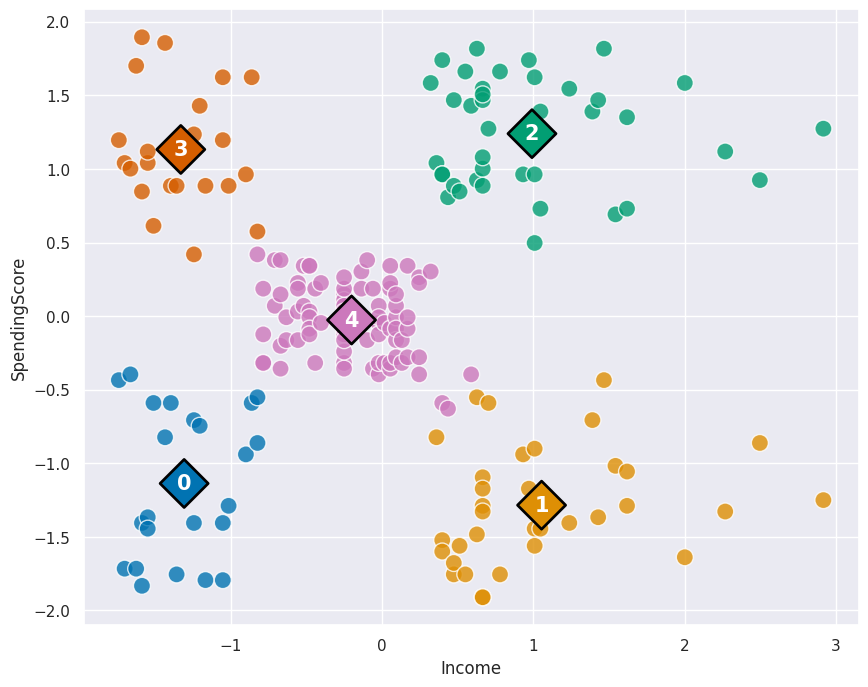

In [58]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)


# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

In [59]:
customers['Cluster'] = km.labels_.tolist()
customers.head(10)

,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,3
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,3
4,5,Female,31,17000,40,0
5,6,Female,22,17000,76,3
6,7,Female,35,18000,6,0
7,8,Female,23,18000,94,3
8,9,Male,64,19000,3,0
9,10,Female,30,19000,72,3


In [60]:
customers = pd.get_dummies(customers, columns = ['Gender'])
customers.head(10)

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15000,39,0,0,1
1,2,21,15000,81,3,0,1
2,3,20,16000,6,0,1,0
3,4,23,16000,77,3,1,0
4,5,31,17000,40,0,1,0
5,6,22,17000,76,3,1,0
6,7,35,18000,6,0,1,0
7,8,23,18000,94,3,1,0
8,9,64,19000,3,0,0,1
9,10,30,19000,72,3,1,0


In [61]:
customers.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

Gender_Female        0.56
Gender_Male          0.44
Age                 36.00
Income           61500.00
SpendingScore       50.00
dtype: float64

In [62]:
customers.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.46,0.54,42.0,85000.0,16.0
2,0.54,0.46,32.0,79000.0,83.0
3,0.59,0.41,23.5,24500.0,77.0
4,0.59,0.41,46.0,54000.0,50.0
